# Interpolation and Extrapolation Lab

## Investigating Runge's Phenomenon

Polynomial interpolation is a widely used technique to approximate functions by constructing a polynomial that passes through a given set of data points.
While this approach is popular, it has limitations, particularly when using high-degree polynomials over evenly spaced points. 

One of the most famous examples of this limitation is **Runge's Phenomenon**, first observed by Carl Runge.
It demonstrates that using evenly spaced interpolation points for high-degree polynomials can lead to large oscillations, particularly near the edges of the interpolation interval.
These oscillations become more pronounced as the number of interpolation points increases, making the polynomial approximation unreliable.

A key way to mitigate this issue is to use **Chebyshev nodes** instead of evenly spaced nodes.
Chebyshev nodes are distributed in such a way that they reduce the maximum error of polynomial interpolation, leading to a more stable and accurate approximation.

### Goals of this Lab

1. Understand and visualize **Runge’s Phenomenon** by using polynomial interpolation on equidistant nodes.
2. Compare the performance of equidistant nodes with **Chebyshev nodes** to see how they mitigate oscillations.
3. Explore how increasing the number of interpolation points affects the approximation.

### Step 1: Define Runge's Function

Runge's function is defined as:
\begin{align}
f(x) = \frac{1}{1 + 25x^2}
\end{align}

This function is well-behaved within $[-1,1]$, yet when interpolated using high-degree polynomials, it exhibits large oscillations at the edges.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define Runge's function
def Runge(x):
    # HANDSON: implement Runge's function here
    return 1 / (1 + 25* x**2)

# Define dense x values for plotting
X = np.linspace(-1, 1, 1001)
Y = Runge(X)

### Step 2: Generate Interpolation Nodes

We will generate two sets of interpolation nodes:
1. **Equidistant nodes**: Evenly spaced across the interval $[-1,1]$.
2. **Chebyshev nodes**: Specially chosen to reduce oscillatory behavior.

In [7]:
# Number of interpolation points
N = 15

# Equidistant nodes
Xeq = np.linspace(-1, 1, N)
Yeq = Runge(Xeq)

# Chebyshev nodes
Xch = np.cos((2 * np.arange(N) + 1) / (2 * N) * np.pi)
Ych = Runge(Xch)

### Step 3: Perform Polynomial Interpolation

Using Neville's algorithm we developed in `notes.ipynb`, construct polynomials based on the two sets of nodes.

In [4]:
# HANDSON: copy and paste PolynomialInterpolator from the notes
class PolynomialInterpolator:
    def __init__(self, xs, ys, n=None):
        if n is None:
            n = len(xs)

        assert len(xs) == len(ys)
        assert len(xs) >= n

        self.xs, self.ys, self.n = xs, ys, n

    def __call__(self, target, search_method='hunt'):

        C = np.copy(self.ys)
        D = np.copy(self.ys)

        i = np.argmin(abs(self.xs - target))
        y = self.ys[i]
        i-= 1

        for n in range(1,self.n):
            ho  = self.xs[:-n] - target
            hp  = self.xs[+n:] - target
            w   = C[1:self.n-n+1] - D[:-n]
            den = ho - hp
            if any(den == 0):
                raise Exception("two input xs are (to within roundoﬀ) identical.")
            else:
                f = w / den
            D[:-n] = hp * f
            C[:-n] = ho * f

            if 2*(i+1) < (self.n-n):
                self.dy = C[i+1]
            else:
                self.dy = D[i]
                i -= 1

            y += self.dy

        return y

In [8]:
Runge_eq = PolynomialInterpolator(Xeq, Yeq)
Runge_ch = PolynomialInterpolator(Xch, Ych)

### Step 4: Visualize the Results

Now, we plot the original function along with the interpolated curves.

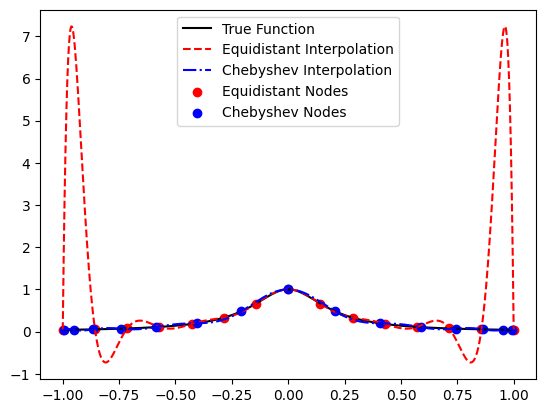

In [9]:
plt.plot(X, Y, 'k-', label="True Function")
plt.plot(X, [Runge_eq(x) for x in X], 'r--', label="Equidistant Interpolation")
plt.plot(X, [Runge_ch(x) for x in X], 'b-.', label="Chebyshev Interpolation")
plt.scatter(Xeq, Yeq, c='r', label="Equidistant Nodes")
plt.scatter(Xch, Ych, c='b', label="Chebyshev Nodes")
plt.legend()

### Exploration Questions

1. How does the interpolated curve behave near the edges when using equidistant points?
2. Why do Chebyshev nodes reduce oscillations compared to equidistant nodes?
3. Try increasing `n_points` to 15 or 20. What happens, and why?
4. What real-world scenarios might suffer from Runge’s phenomenon? How could we mitigate it?

## Extrapolation is Difficult

Interpolation works well within a known data range, but extrapolation---predicting values beyond that range---can lead to large errors.
This lab explores the limitations of extrapolation using polynomials.

In [10]:
# Define a function with known behavior outside the range

def f(x):
    # HANDSON: define, e.g., sin(2 pi x), exp(-x^2/2)
    return np.sin(2 * np.pi * x)
    

In [11]:
# Sample points in the limited domain used in the previous example

Y   = f(X)
Yeq = f(Xeq)
Ych = f(Xch)

In [12]:
# Use the PolynomialInterpolator class to create interpolator

f_eq = ...
f_ch = ...

In [ ]:
# Extrapolation range

Xex = np.linspace(-1.5, 1.5, 1001)
Yex = f(Xex)
Yex_eq = [f_eq(x) for x in Xex]
Yex_ch = [f_ch(x) for x in Xex]

In [ ]:
# Plot results

plt.plot(Xex, Yex,    'k-',  label="True Function")
plt.plot(Xex, Yex_eq, 'r--', label="Equidistant Interpolation")
plt.plot(Xex, Yex_ch, 'b-.', label="Chebyshev Interpolation")
plt.scatter(Xeq, Yeq, c='r', label="Equidistant Nodes")
plt.scatter(Xch, Ych, c='b', label="Chebyshev Nodes")
plt.ylim(-5,5)
plt.legend()

### Exploration Questions

1. How well does the extrapolated spline match the true function outside the sampled range?
2. Try increasing the number of sample points. Does it improve extrapolation?
3. What real-world problems could arise due to poor extrapolation behavior?